# Video texture features and Motion tracking data Postprocessing 
Author(s): Miguel Xochicale @mxochicale    
Contributor(s): Sujon Hekim

## History
* 17th May 2023: Add prototype
* 10th Aug 2023: Adds saving dataframes in cvs files
* 26th Sep 2023: Reads data from Thu-24-Aug-2023
* 3rd Oct 2023: Adds time to check execution time of cells

## Summary


### How to run the notebook
1. Go to repository path: `$HOME/repositories/`
Open repo in pycharm and in the terminal type:
```
git checkout main # or the branch
git pull # to bring a local branch up-to-date with its remote version
```

2. Launch Notebook server. Go to you repository path: cd $HOME/repositories/ and type in the pycharm terminal:
```
mamba activate *VE 
jupyter notebook --browser=firefox
```
which will open your web-browser.

## References 
1. https://stackoverflow.com/questions/45704999/how-to-convert-vector-wrapped-as-string-to-numpy-array-in-pandas-dataframe
2. https://github.com/YuxinZhaozyx/pytorch-VideoDataset/blob/master/datasets.py (Future work)
3. https://stackoverflow.com/questions/65446464/how-to-convert-a-video-in-numpy-array
4. https://matplotlib.org/stable/gallery/specialty_plots/mri_with_eeg.html#sphx-glr-gallery-specialty-plots-mri-with-eeg-py 
5. https://www.researchgate.net/publication/326881329_Medical_image_security_enhancement_using_two_dimensional_chaotic_mapping_optimized_by_self-adaptive_grey_wolf_algorithm 

    

## Setting imports and datasets paths

In [1]:
from sentient.utils.utils import video_to_tensor, compute_texture_array_and_plot
from sentient.utils.utils import data_frame_of_texture_analysis
from sentient.utils.utils import get_and_plot_imu_data_analysis

import os
import time
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
import skimage
from typing import Tuple, List

HOME_PATH = os.path.expanduser(f'~')
USERNAME = os.path.split(HOME_PATH)[1]
REPOSITORY_PATH='repositories/sentient'

###########################
###SETTING DATA_PATHS
#DATA_PATH='repositories/datasets/in2research2023/Thu-27-Jul-2023' 

RAW_DATA_PATH='repositories/datasets/in2research2023/Thu-24-Aug-2023'
PREPROCESSED_DATA_PATH='repositories/datasets/in2research2023/Thu-24-Aug-2023-preprocessed'

FULL_REPO_DATA_PATH = HOME_PATH +'/' + RAW_DATA_PATH
FULL_REPO_PREPROCESSED_DATA_PATH = HOME_PATH +'/' + PREPROCESSED_DATA_PATH +'/'
os.makedirs(FULL_REPO_PREPROCESSED_DATA_PATH, exist_ok=True) 

## Printing Versions and paths
print(FULL_REPO_DATA_PATH)
print(f'PyTorch Version: {torch.__version__}')
print(f'pandas Version: {pd.__version__}')
print(f'numpy Version: {np.__version__}')
print(f'cv2 Version: {cv2.__version__}')
print(f'skimage Version: {skimage.__version__}')



/home/mxochicale/repositories/datasets/in2research2023/Thu-24-Aug-2023
PyTorch Version: 2.1.2.post300
pandas Version: 2.2.1
numpy Version: 1.26.4
cv2 Version: 4.9.0
skimage Version: 0.22.0


# Reading video frames

In [2]:
PARTICIPANTNN = 'participant01'
PARTICIPANTNN_TESTNN = 'participant01-test01-rep01-1g-5mins' #51,328
# PARTICIPANTNN_TESTNN = 'participant01-test01-rep02-1g-5mins' #51,178
# PARTICIPANTNN_TESTNN = 'participant01-test02-rep01-1g-5mins' #49,183
# PARTICIPANTNN_TESTNN = 'participant01-test02-rep02-1g-5mins' #47,577
# PARTICIPANTNN_TESTNN = 'participant01-test03-rep01-1g-5mins' #48,688
# PARTICIPANTNN_TESTNN = 'participant01-test03-rep02-1g-5mins'#48,789

# PARTICIPANTNN = participant02
# PARTICIPANTNN_TESTNN = 'participant02-test01-rep01-1g-5mins'#49,490
# PARTICIPANTNN_TESTNN = 'participant02-test01-rep02-1g-5mins'#49,219
# PARTICIPANTNN_TESTNN = 'participant02-test02-rep01-1g-5mins'#48,043
# PARTICIPANTNN_TESTNN = 'participant02-test02-rep02-1g-5mins'#49,606
# PARTICIPANTNN_TESTNN = 'participant02-test03-rep01-1g-5mins'#48,875
# PARTICIPANTNN_TESTNN = 'participant02-test03-rep02-1g-5mins'#48,050

start_frame_number = 0
end_frame_number = 40000 #(resulted samples are end_frame_number-2)

display_factor_for_texture_analysis_array = 100000

# display_figures=False
display_figures=True


In [3]:
start_time = time.time()

CSV_FILENAME_FOR_TEXTURE_ANALYSIS=PARTICIPANTNN_TESTNN+'.csv'
FULL_PATH_AND_AVI_FILE = os.path.join(FULL_REPO_DATA_PATH, PARTICIPANTNN, PARTICIPANTNN_TESTNN+'.avi')
FULL_PATH_AND_CSV_FILE = os.path.join(FULL_REPO_DATA_PATH, PARTICIPANTNN, PARTICIPANTNN_TESTNN+'.avi.csv')

total_number_of_frames = end_frame_number - start_frame_number

video, frames_timestam = video_to_tensor(FULL_PATH_AND_AVI_FILE, start_frame_number, end_frame_number)

num_frames, height, width = video.shape
print(f'num_frames: {num_frames}')
print(f'height: {height}')
print(f'width: {width}')

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time}")

  
  
  VIDEO_FEATURES
    video_name=/home/mxochicale/repositories/datasets/in2research2023/Thu-24-Aug-2023/participant01/participant01-test01-rep01-1g-5mins.avi
    Frame_height=480, frame_width=640 fps=120 nframes=51328 
  
  
num_frames: 39999
height: 480
width: 640
Execution time: 108.88795852661133


# Generating texture_analysis_array and plotting frames and histograms

frame_i: 0, timestamp 00:00:0.000


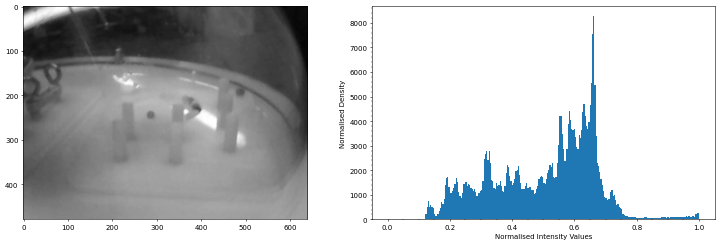

Execution time: 132.7299554347992


In [4]:
# This takes a while as it computes texture feature for each frame and save it in texture_analysis_array
start_time = time.time()
texture_analysis_array = compute_texture_array_and_plot(video, frames_timestam, display_figures, display_factor_for_texture_analysis_array)

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time}")

# Plotting texture analysis of all frames in the video

In [5]:
df_texture_analysis = data_frame_of_texture_analysis(texture_analysis_array, start_frame_number, end_frame_number)
# df_texture_analysis.to_csv(FULL_REPO_PREPROCESSED_DATA_PATH+PARTICIPANTNN_TESTNN+'_texture_analysis'+'.csv', index=False) 

In [6]:
print(df_texture_analysis)

       frame_i  Contrast  Correlation  Dissimilarity    Energy  Homogeneity  \
0            0  3.308281     0.999091       0.866927  0.058461     0.698238   
1            1  3.308281     0.999091       0.866927  0.058461     0.698238   
2            2  3.308281     0.999091       0.866927  0.058461     0.698238   
3            3  3.308281     0.999091       0.866927  0.058461     0.698238   
4            4  3.308281     0.999091       0.866927  0.058461     0.698238   
...        ...       ...          ...            ...       ...          ...   
39994    39994  7.055966     0.998755       1.263074  0.058015     0.632710   
39995    39995  7.055966     0.998755       1.263074  0.058015     0.632710   
39996    39996  7.055966     0.998755       1.263074  0.058015     0.632710   
39997    39997  7.055966     0.998755       1.263074  0.058015     0.632710   
39998    39998  7.055966     0.998755       1.263074  0.058015     0.632710   

            ASM  Contrast_normalised  Correlation_n

## Reading and ploting csv files

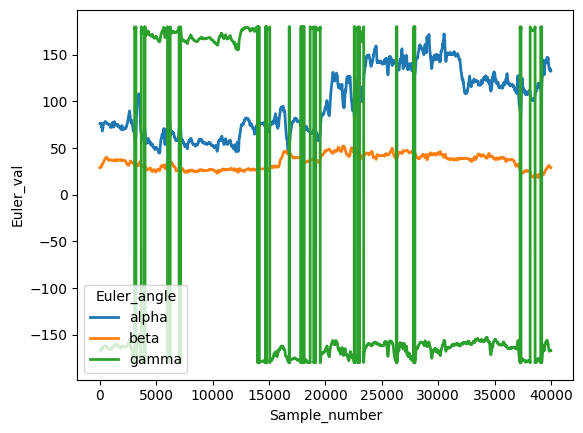

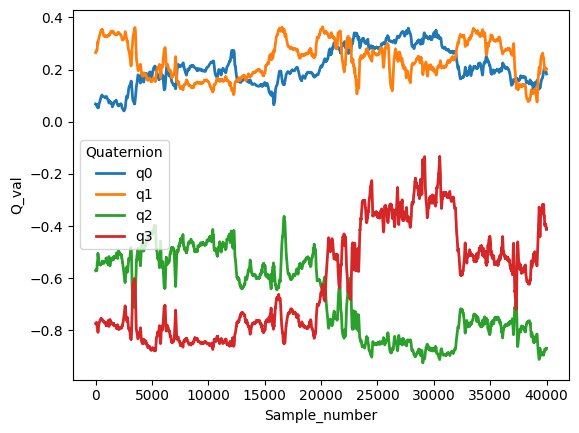

In [7]:
df, ndf, nqdf = get_and_plot_imu_data_analysis(FULL_PATH_AND_CSV_FILE, start_frame_number, end_frame_number, display_figures)


In [8]:
ndf

,Sample_number,Euler_angle,Euler_val
0,0,alpha,76.263512
1,1,alpha,76.268105
2,2,alpha,76.277130
3,3,alpha,76.290985
4,4,alpha,76.309441
...,...,...,...
119992,39994,gamma,-166.650131
119993,39995,gamma,-166.682495
119994,39996,gamma,-166.719223
119995,39997,gamma,-166.758148


In [9]:
nqdf

,Sample_number,Quaternion,Q_val
0,0,q0,0.068419
1,1,q0,0.068369
2,2,q0,0.068327
3,3,q0,0.068299
4,4,q0,0.068282
...,...,...,...
159991,39994,q3,-0.410072
159992,39995,q3,-0.410758
159993,39996,q3,-0.411539
159994,39997,q3,-0.412369


In [10]:
df
# To save full dataframe as cvs
# df.to_csv(FULL_REPO_PREPROCESSED_DATA_PATH+PARTICIPANTNN_TESTNN+'_tracker_sensor'+'.csv', index=False) 

,Sample_number,epoch machine time (ns),Timestamp for frame capture.read (ns),Timestamp LPMSB2 (s),Quaternions_LPMSB2,Euler_LPMSB2,A,B,C,q0,q1,q2,q3
0,0,1692882663543262563,1692882663543480781,1212.310,"[0.06841902434825897, 0.2655182480812073, -0.5...","[76.26351165771484, 29.279926300048828, -166.9...",76.263512,29.279926,-166.927963,0.068419,0.265518,-0.570912,-0.773872
1,1,1692882663579540015,1692882663543480781,1212.315,"[0.06836933642625809, 0.2656002640724182, -0.5...","[76.26810455322266, 29.283796310424805, -166.9...",76.268105,29.283796,-166.915955,0.068369,0.265600,-0.570907,-0.773852
2,2,1692882663587530055,1692882663543480781,1212.320,"[0.06832683086395264, 0.2656897306442261, -0.5...","[76.27713012695312, 29.288410186767578, -166.9...",76.277130,29.288410,-166.902878,0.068327,0.265690,-0.570928,-0.773810
3,3,1692882663596395389,1692882663543480781,1212.325,"[0.0682985931634903, 0.2657907009124756, -0.57...","[76.29098510742188, 29.29462432861328, -166.88...",76.290985,29.294624,-166.888977,0.068299,0.265791,-0.570976,-0.773742
4,4,1692882663604048535,1692882663543480781,1212.330,"[0.06828176230192184, 0.26590365171432495, -0....","[76.30944061279297, 29.30230140686035, -166.87...",76.309441,29.302301,-166.874039,0.068282,0.265904,-0.571050,-0.773651
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39994,39994,1692882908617529886,1692882908573368408,1412.280,"[0.18388304114341736, 0.202625572681427, -0.87...","[133.0067596435547, 29.08807945251465, -166.65...",133.006760,29.088079,-166.650131,0.183883,0.202626,-0.870041,-0.410072
39995,39995,1692882908623469009,1692882908573368408,1412.285,"[0.18375511467456818, 0.2025071382522583, -0.8...","[132.90953063964844, 29.07884979248047, -166.6...",132.909531,29.078850,-166.682495,0.183755,0.202507,-0.869772,-0.410758
39996,39996,1692882908629118489,1692882908573368408,1412.290,"[0.183613583445549, 0.2023746818304062, -0.869...","[132.79884338378906, 29.068876266479492, -166....",132.798843,29.068876,-166.719223,0.183614,0.202375,-0.869463,-0.411539
39997,39997,1692882908635133909,1692882908573368408,1412.295,"[0.18344998359680176, 0.20222927629947662, -0....","[132.68121337890625, 29.056562423706055, -166....",132.681213,29.056562,-166.758148,0.183450,0.202229,-0.869138,-0.412369


## Saving dataframes as cvs

In [11]:
# df_a = df_texture_analysis[['frame_i', 'Contrast_normalised', 'Correlation_normalised', 'Dissimilarity_normalised', 'Energy_normalised', 'Homogeneity_normalised', 'ASM_normalised']]
df_a = df_texture_analysis[['frame_i', 'Contrast_normalised', 'Correlation_normalised', 'Dissimilarity_normalised', 'Homogeneity_normalised']]

df_b = df[['q0', 'q1', 'q2', 'q3']]
dff = pd.concat([df_a, df_b], axis=1)
print(dff)

dff.to_csv(FULL_REPO_PREPROCESSED_DATA_PATH+PARTICIPANTNN_TESTNN+'_normalised_quaternions'+'.csv', index=False) 



       frame_i  Contrast_normalised  Correlation_normalised  \
0            0            -3.194944                1.680075   
1            1            -3.194944                1.680075   
2            2            -3.194944                1.680075   
3            3            -3.194944                1.680075   
4            4            -3.194944                1.680075   
...        ...                  ...                     ...   
39994    39994             0.375632               -0.569017   
39995    39995             0.375632               -0.569017   
39996    39996             0.375632               -0.569017   
39997    39997             0.375632               -0.569017   
39998    39998             0.375632               -0.569017   

       Dissimilarity_normalised  Homogeneity_normalised        q0        q1  \
0                     -3.957529                5.014039  0.068419  0.265518   
1                     -3.957529                5.014039  0.068369  0.265600   
2     